<a href="https://colab.research.google.com/github/Valdini/COURSERA_CAPSTONE/blob/main/Part_1_Toronto_Segmenting_%26_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1**

In [71]:
import pandas as pd #importing the pandas library
import numpy as np #importing the numpy library
df_scrape = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M') #telling pandas to find URL
df_table = df_scrape[0] #telling pandas to take table
df_toronto = df_table[['Postal Code','Borough','Neighbourhood']] #taking table columns
df_toronto.columns = ['Postal Code','Borough','Neighborhood'] #setting/renaming table columns
df_toronto_cleaned = df_toronto[df_toronto.Borough != 'Not assigned'] #ignoring not assigned values for borough
df_toronto_cleaned.groupby('Postal Code') #showing all neighborhoods per postal code
df_tc = df_toronto_cleaned #shorting the table name
df_tc['Neighborhood'] = np.where(df_tc['Neighborhood'] == 'Not assigned', df_tc['Borough'], df_tc['Neighborhood']) #replacing not assigned values of neighborhood with their borough values
df_tc.index = df_tc.index - 2 #cleaning index

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [72]:
df_tc #printing dataframe

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
158,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
163,M4Y,Downtown Toronto,Church and Wellesley
166,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
167,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [73]:
df_tc.shape #printing number of rows and columns the dataframe has

(103, 3)

**Part 2**

In [80]:
df_geo = pd.read_csv('http://cocl.us/Geospatial_data') #creating a new dataframe using the geospatial data csv file
df_full = df_tc.merge(df_geo,on='Postal Code',how = 'left') #adding the latitude and longitue by merging on the common postal code column
df_full

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [109]:
df_full['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

**Part 3**

In [ ]:
import requests # library to handle requests
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

In [ ]:
CLIENT_ID = 'QUUMEYFVW03TKZNFU4OD15I1EC45ZZ0VI1P5ZMENZBIFGJA1' #Foursquare ID
CLIENT_SECRET = 'U1TGTC0RS0PQ4GVUD5LZDS5DMZDWQHI1KUGXSANWEM014INU' #Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [234]:
address = 'Toronto'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
location_map = folium.Map(location=[latitude, longitude], zoom_start=10)

In [ ]:
Latitudelist = df_full['Latitude'].astype(float).values.tolist()
Longitudelist = df_full['Longitude'].astype(float).values.tolist()
'''Clusterlist = df_full['Cluster'].astype(float).values.tolist()
df_clusters = pd.DataFrame(
    {'Lat': Latitudelist,
     'Long': Longitudelist,
     'Clust': Clusterlist
    })
Cluster0LatMax = df_clusters['Lat'].loc[df_clusters['Clust'] == 0.0].max()
Cluster0LatMin = df_clusters['Lat'].loc[df_clusters['Clust'] == 0.0].min()
Cluster0LongMax = df_clusters['Long'].loc[df_clusters['Clust'] == 0.0].max()
Cluster0LongMin = df_clusters['Long'].loc[df_clusters['Clust'] == 0.0].min()

Cluster1LatMax = df_clusters['Lat'].loc[df_clusters['Clust'] == 1.0].max()
Cluster1LatMin = df_clusters['Lat'].loc[df_clusters['Clust'] == 1.0].min()
Cluster1LongMax = df_clusters['Long'].loc[df_clusters['Clust'] == 1.0].max()
Cluster1LongMin = df_clusters['Long'].loc[df_clusters['Clust'] == 1.0].min()

Cluster2LatMax = df_clusters['Lat'].loc[df_clusters['Clust'] == 2.0].max()
Cluster2LatMin = df_clusters['Lat'].loc[df_clusters['Clust'] == 2.0].min()
Cluster2LongMax = df_clusters['Long'].loc[df_clusters['Clust'] == 2.0].max()
Cluster2LongMin = df_clusters['Long'].loc[df_clusters['Clust'] == 2.0].min()

Cluster3LatMax = df_clusters['Lat'].loc[df_clusters['Clust'] == 3.0].max()
Cluster3LatMin = df_clusters['Lat'].loc[df_clusters['Clust'] == 3.0].min()
Cluster3LongMax = df_clusters['Long'].loc[df_clusters['Clust'] == 3.0].max()
Cluster3LongMin = df_clusters['Long'].loc[df_clusters['Clust'] == 3.0].min()

Cluster4LatMax = df_clusters['Lat'].loc[df_clusters['Clust'] == 4.0].max()
Cluster4LatMin = df_clusters['Lat'].loc[df_clusters['Clust'] == 4.0].min()
Cluster4LongMax = df_clusters['Long'].loc[df_clusters['Clust'] == 4.0].max()
Cluster4LongMin = df_clusters['Long'].loc[df_clusters['Clust'] == 4.0].min()'''

In [236]:
for lat,lng in zip(Latitudelist,Longitudelist):
  folium.CircleMarker(
    [lat,lng],
    radius=10,
    color='red',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(location_map)
location_map

In [237]:
df_array = df_full.to_numpy() #creating numpy array for analysis
from sklearn.cluster import KMeans #importing k-means clustering algorithm
Geodata = df_array[:, [3,4]]

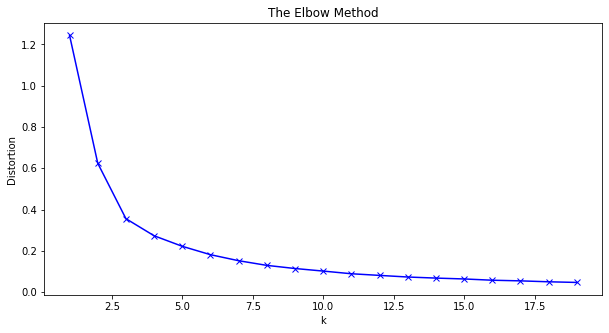

In [238]:
distortions = []
K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(Geodata)
    distortions.append(kmean.inertia_)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [239]:
km = KMeans(n_clusters=5, n_init = 10, max_iter = 300, tol=1e-04, random_state=0).fit(Geodata)
predictor = km.fit_predict(Geodata)
df_full['Cluster']  = km.labels_

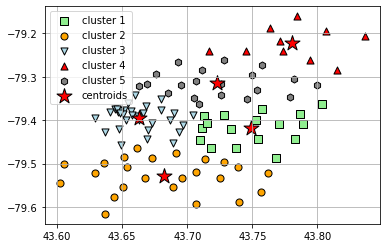

In [240]:
import matplotlib.pyplot as plt
plt.scatter(
    Geodata[predictor == 0, 0], Geodata[predictor == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    Geodata[predictor == 1, 0], Geodata[predictor == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    Geodata[predictor == 2, 0], Geodata[predictor == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    Geodata[predictor == 3, 0], Geodata[predictor == 3, 1],
    s=50, c='red',
    marker='^', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    Geodata[predictor == 4, 0], Geodata[predictor == 4, 1],
    s=50, c='grey',
    marker='h', edgecolor='black',
    label='cluster 5'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()